# First Submission for Titanic Prediction Competition on Kaggle

This is the code for my first submission for the Kaggle Titanic Competition
I scored an accuracy rate of 0.75837

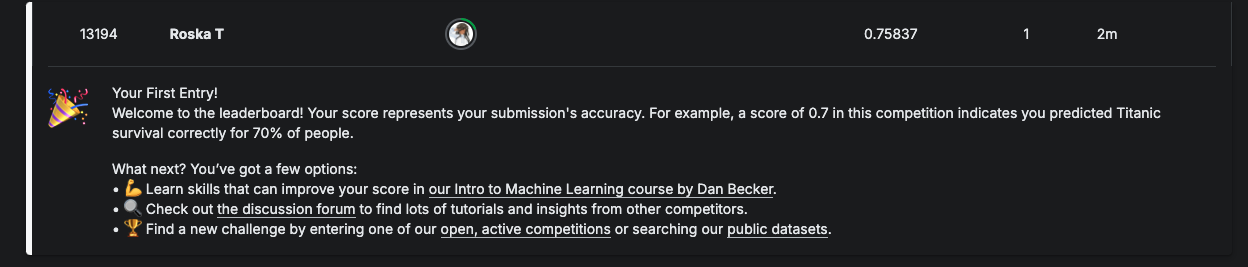


Please note there were some minor changes done to make the code look neater which impacted the score a tiny bit 😅

In [3]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading the files
train = pd.read_csv("/Users/roskat/Desktop/DS/titanic/train.csv")
test = pd.read_csv("/Users/roskat/Desktop/DS/titanic/test.csv")
sample = pd.read_csv("/Users/roskat/Desktop/DS/titanic/gender_submission.csv")

# Data Overview

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Preprocessing

### Finding and filling in null values

#### Viewing the missing values in Age, Embarked and Fare on both test and train dataframes

In [15]:
train['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [16]:
test['Age'].isnull().value_counts()

Age
False    332
True      86
Name: count, dtype: int64

In [17]:
train['Embarked'].isnull().value_counts()

Embarked
False    889
True       2
Name: count, dtype: int64

In [18]:
test['Embarked'].isnull().value_counts()

Embarked
False    418
Name: count, dtype: int64

In [19]:
train['Fare'].isnull().value_counts()

Fare
False    891
Name: count, dtype: int64

In [20]:
test['Fare'].isnull().value_counts()

Fare
False    417
True       1
Name: count, dtype: int64

### Filling in all missing values
Numerical Values will be filled with the mean and categorical will be filled in with the mode

In [22]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [23]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [24]:
train['Fare']=train['Fare'].fillna(train['Fare'].mean())

In [25]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [26]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [27]:
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode()[0])

### Remove columns that are not needed

In [29]:
train = train.drop(columns=['Cabin', 'Name', 'Ticket','PassengerId'])

In [30]:
train.head(5) # Double check if the columns have been removed properly

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
test = test.drop(columns=['Cabin', 'Name', 'Ticket'])

In [32]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Exploratory Data Analysis

1. Comparing how many people survived

In [35]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

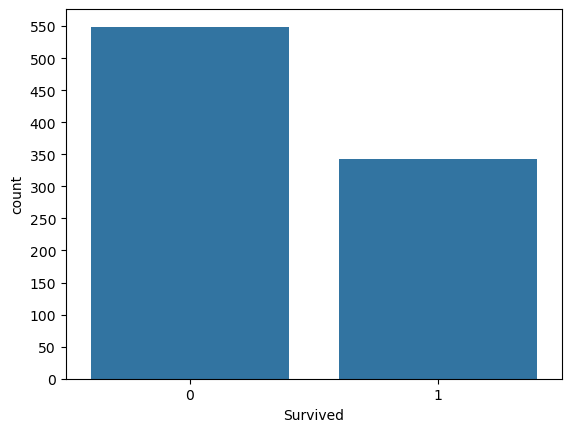

In [36]:
ax = sns.barplot(train['Survived'].value_counts())
ax.set_yticks(range(0, train['Survived'].value_counts().max() + 50, 50))
plt.show()


2. Comparing which cabin class were most likely to survive

In [38]:
survive = train['Survived'].groupby(train['Pclass']).value_counts()

In [39]:
survive

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [40]:
train['Pclass'] = train['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})

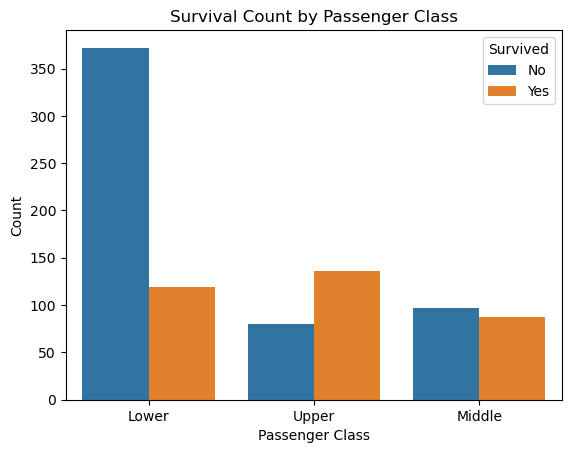

In [41]:
ax = sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

3. Where did most of the passengers that did not make it, board the ship from

In [43]:
train['Embarked'].groupby(train['Survived']).value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           219
          C            93
          Q            30
Name: count, dtype: int64

In [44]:
train['Embarked'] = train['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

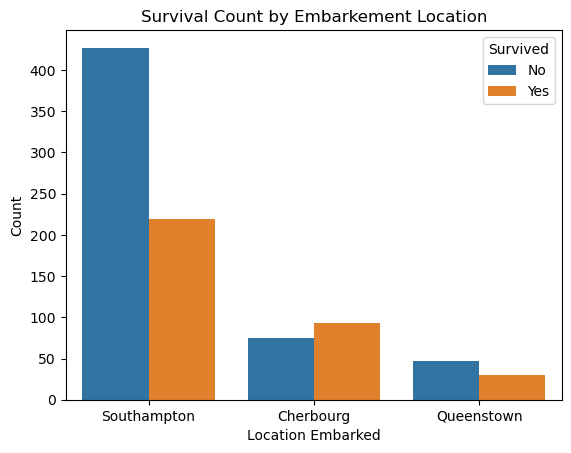

In [45]:
ax = sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
# Add labels and title
plt.xlabel('Location Embarked')
plt.ylabel('Count')
plt.title('Survival Count by Embarkement Location')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

4. How many people had additional family board the boat (SibSp - Number of Siblings/Spouses Aboard, Parch - Number of Parents/Children Aboard)

In [47]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

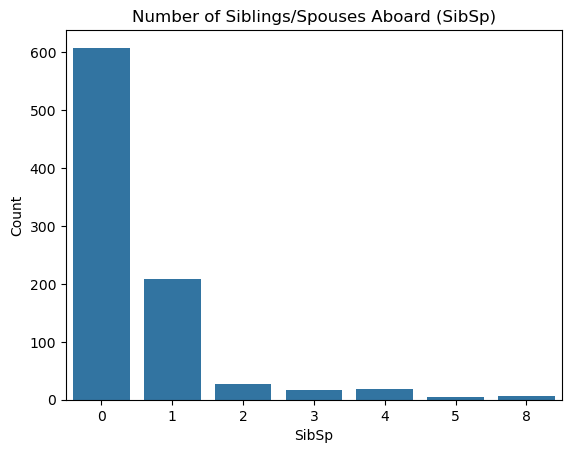

In [48]:
sns.countplot(data=train, x='SibSp')
plt.title('Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

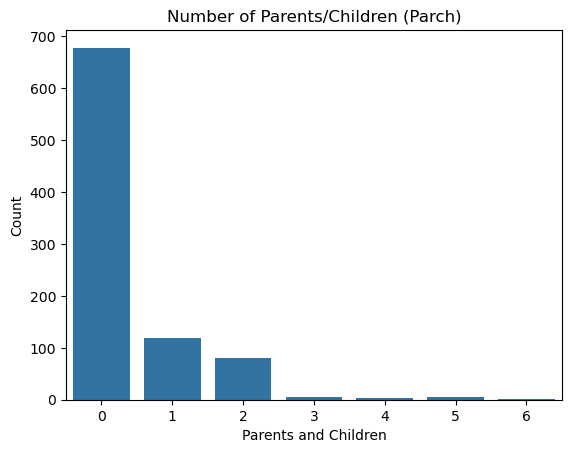

In [49]:
sns.countplot(data=train, x='Parch')
plt.title('Number of Parents/Children (Parch)')
plt.xlabel('Parents and Children')
plt.ylabel('Count')
plt.show()

## Data Preprocessing again

In [51]:
train.info() # Check which values are objects so that they can be converted to numerical values for model training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [52]:
# Reverse map from string labels back to integers
reverse_mapping = {'Upper': 1, 'Middle': 2, 'Lower': 3}
train['Pclass'] = train['Pclass'].map(reverse_mapping)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [54]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}) # Label encoding (Simple mapping)
train['Embarked'] = train['Embarked'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}).astype(int)

In [55]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [57]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [59]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1}) # Label encoding (Simple mapping)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


## Model selection, training and testing data

In [62]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = model.predict(X_val)
print(y_pred)  # First 5 predictions

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)


[[91 14]
 [18 56]]


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [70]:
model.fit(X, y)  # Full training set

RandomForestClassifier(random_state=42)

In [71]:
test_features = test[X.columns]

test_predictions = model.predict(test_features)

In [72]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
